In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)
print("Numpy version:", np.__version__)

OpenCV version: 4.8.1

Numpy version: 1.26.0

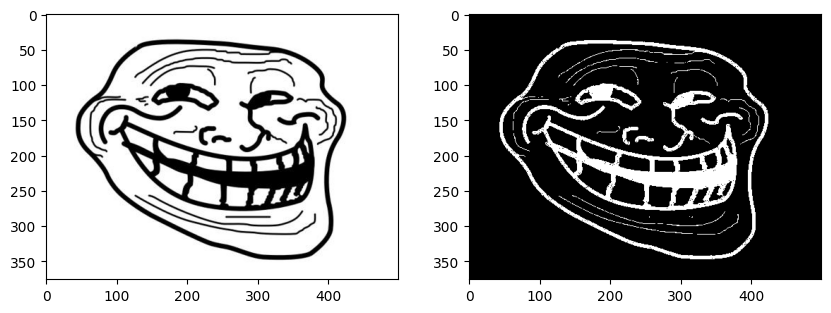

In [2]:
image = cv2.imread("./imgs/Trollface.jpg")
# Convert to B and W only img with a threshold of 127
bw = cv2.threshold(image, 12, 255, cv2.THRESH_BINARY)[1]
bw = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)
# invert the image
bw = cv2.bitwise_not(bw)
# convert to 0 and 1 values
bw[bw > 0] = 1

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image)
ax[1].imshow(bw, cmap="gray")
plt.show()

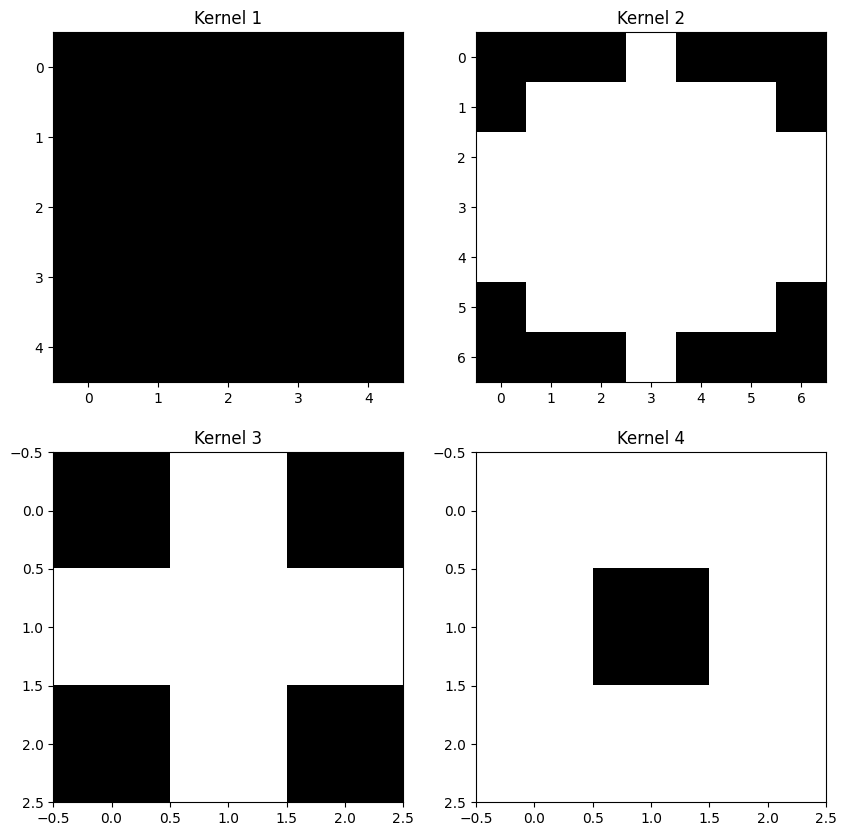

In [3]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
kernel4 = np.ones((3,3),np.uint8)
kernel4[1,1] = 0

ax,fig = plt.subplots(2,2,figsize=(10,10))
fig[0,0].imshow(kernel1, cmap="gray")
fig[0,0].set_title("Kernel 1")

fig[0,1].imshow(kernel2, cmap="gray")
fig[0,1].set_title("Kernel 2")

fig[1,0].imshow(kernel3, cmap="gray")
fig[1,0].set_title("Kernel 3")

fig[1,1].imshow(kernel4, cmap="gray")
fig[1,1].set_title("Kernel 4")

plt.show()

In [4]:
# using openCV
def hit_or_miss(bw_img: np.ndarray,kernel: np.ndarray)->np.ndarray:
    return cv2.morphologyEx(bw_img, cv2.MORPH_HITMISS, kernel)

In [49]:
def hit_or_miss(bw_img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    # Create an output image filled with zeros
    output = np.zeros_like(bw_img)

    # Get the dimensions of the image and the kernel
    img_height, img_width = bw_img.shape
    kernel_height, kernel_width = kernel.shape

    # Calculate the padding needed for the image
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image
    padded_img = np.pad(bw_img, ((pad_height, pad_height), (pad_width, pad_width)))

    # Iterate over the image
    for i in range(img_height):
        for j in range(img_width):
            # Extract the neighborhood
            neighborhood = padded_img[i:i+kernel_height, j:j+kernel_width]
            kernel_f = kernel.flatten()
            is_match = all([x == y and kernel_f == 1 for x, y in zip(kernel_f, neighborhood.flatten())])
            if is_match:
                output[i, j] = 1
                
    return output

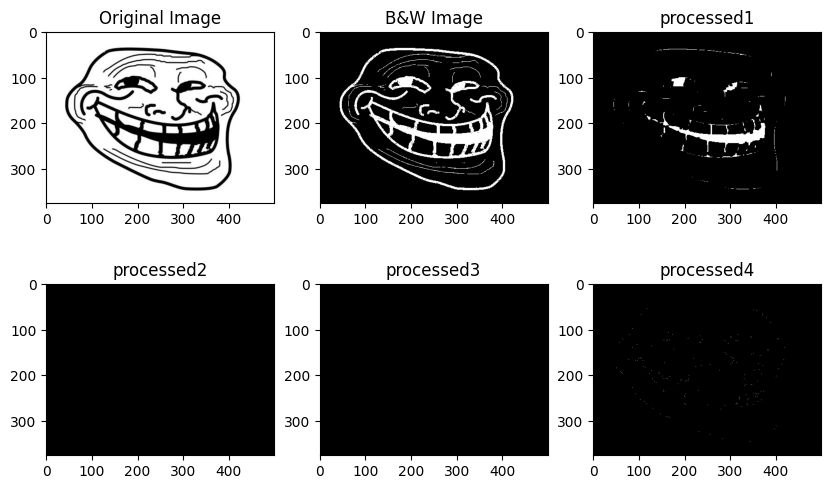

In [50]:
data = {
"processed1":  hit_or_miss(bw,kernel1) ,
"processed2":  hit_or_miss(bw,kernel2) ,
"processed3": hit_or_miss(bw,kernel3) ,
"processed4":  hit_or_miss(bw,kernel4),
"Original Image": image,
"B&W Image": bw
}

_,plot = plt.subplots(2,3,figsize=(10,6))
plot[0,0].imshow(data["Original Image"])
plot[0,0].set_title("Original Image")

plot[0,1].imshow(data["B&W Image"], cmap="gray")
plot[0,1].set_title("B&W Image")

plot[0,2].imshow(data["processed1"], cmap="gray")
plot[0,2].set_title("processed1")

plot[1,0].imshow(data["processed2"], cmap="gray")
plot[1,0].set_title("processed2")

plot[1,1].imshow(data["processed3"], cmap="gray")
plot[1,1].set_title("processed3")

plot[1,2].imshow(data["processed4"], cmap="gray")
plot[1,2].set_title("processed4")

plt.show()